## Yapay Sinir Ağları Örneği

In [1]:
# Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

# derin öğrenmede keras olacak ama sklearn ile train ve test böleceğiz
from sklearn.model_selection import train_test_split

In [2]:
# Veriyi içeri alalım
veri = pd.read_csv("mnist_train.csv")
# 28x28 pixel 785 sütunlu bir veri
print("Veri boyutu : ", veri.shape)
veri.head()

Veri boyutu :  (60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Sadece etiketi 1 ve 0 olanları alalım.
label_filtre0 = 0 # etiket 0
label_filtre1 = 1 # etiket 1
# etiketi 0 ve 1 olanları filtreleyip, birleştirelim.
veri = pd.concat([veri[veri["label"] == label_filtre0], veri[veri["label"] == label_filtre1]], axis = 0)
veri.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# drop labels
Y_veri = veri["label"]
# X egitim veri seti
X_veri = veri.drop(["label"], axis = 1)
print("X Veri : ", X_veri.shape)
print("Y veri : ", Y_veri.shape)

X Veri :  (12665, 784)
Y veri :  (12665,)


In [5]:
# resmin boyutu
resim_boyutu = int(np.sqrt(X_veri.shape[1]))
resim_boyutu

28

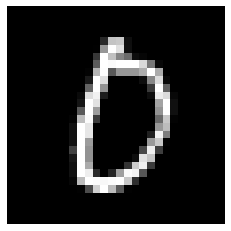

In [6]:
# Görsel - 0 sınıfı
resim1 = X_veri.iloc[900].values
resim1 = resim1.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim1, cmap = "gray")
plt.axis("off")
plt.show()

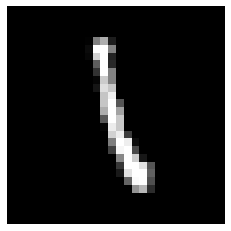

In [7]:
# Görsel - 1 sınıfı
resim2 = X_veri.iloc[8000].values
resim2 = resim2.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim2, cmap = "gray")
plt.axis("off")
plt.show()

In [8]:
# train ve test bölünmesi
X_train, X_test, Y_train, Y_test = train_test_split(X_veri, Y_veri, test_size = 0.15, random_state = 42)
print("X train : ", X_train.shape)
print("X test : ", X_test.shape)

X train :  (10765, 784)
X test :  (1900, 784)


In [9]:
# Transpoze İşlemi
x_train = X_train.T
x_test = X_test.T
y_train = Y_train.values.reshape(-1, 1).T
y_test = Y_test.values.reshape(-1,1).T
print("x eğitim : ", x_train.shape)
print("x test : ", x_test.shape)
print("y eğitim : ", y_train.shape)
print("y test : ", y_test.shape)

x eğitim :  (784, 10765)
x test :  (784, 1900)
y eğitim :  (1, 10765)
y test :  (1, 1900)


In [10]:
# ilklendirme işlemi
def layerSaysiniParametreleriIlklendir(x_train, y_train):
    parmeters = {"weight1" : np.random.randn(3, x_train.shape[0]) * 0.1,
                 "bias1" : np.zeros((3, 1)),
                 "weight2" : np.random.randn(y_train.shape[0], 3) * 0.1,
                 "bias2" : np.zeros((y_train.shape[0], 1))}
    return parmeters

In [11]:
# sigmoid
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

sigmoid(0)

0.5

In [12]:
# ileri yayılma
def ileriYayilmaNN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"], x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    cache = {"Z1" : Z1,
             "A1" : A1,
             "Z2" : Z2,
             "A2" : A2}
    return A2, cache

In [13]:
# maliyet hesabı
def maliyetHesaplaNN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs) / Y.shape[1]
    return cost

In [14]:
# Geriye Yayılma - backward propagation
def geriyeYayilmaNN(parameters, cache, X, Y):
    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2, cache["A1"].T) / X.shape[1]
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T, dZ2) * (1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    grads = {"dweight1" : dW1,
             "dbias1" : db1,
             "dweight2" : dW2,
             "dbias2" : db2}
    return grads

In [15]:
# update parameters
def parametreGuncelleNN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1" : parameters["weight1"] - learning_rate * grads["dweight1"],
                  "bias1" : parameters["bias1"] - learning_rate * grads["dbias1"],
                  "weight2" : parameters["weight2"] - learning_rate * grads["dweight2"], 
                  "bias2" : parameters["bias2"] - learning_rate * grads["dbias2"]}
    return parameters

In [16]:
# tahmin
def tahminNN(parameters, x_test):
    # x test ileri yayılma girdisi
    A2, cache = ileriYayilmaNN(x_test, parameters)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    # eğer z 0.5'den büyükse 1 sınıfı resimleri
    # eğer z 0.5'den küçükse 0 sınıfı resimleri
    for i in range(A2.shape[1]):
        if A2[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    return Y_prediction

İterasyon : 0, Maliyet : 0.355824
İterasyon : 100, Maliyet : 0.234842
İterasyon : 200, Maliyet : 0.148646
İterasyon : 300, Maliyet : 0.102463
İterasyon : 400, Maliyet : 0.077681
İterasyon : 500, Maliyet : 0.062100
İterasyon : 600, Maliyet : 0.052166
İterasyon : 700, Maliyet : 0.044036
İterasyon : 800, Maliyet : 0.037163
İterasyon : 900, Maliyet : 0.033180


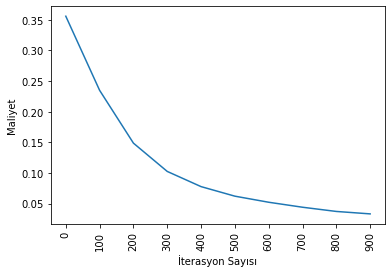

Eğitim doğruluğu : 99.17324663260567 %
Test Doğruluğu : 99.26315789473684 %


In [17]:
# İki katmnalı sinir ağı
def ikiKatmanNN(x_train, y_train, x_test, y_test, num_iterations):
    cost_list = []
    index_list = []
    # ilklendirme
    parameters = layerSaysiniParametreleriIlklendir(x_train, y_train)
    for i in range(0, num_iterations):
        # ileri yayılım
        A2, cache = ileriYayilmaNN(x_train, parameters)
        # Maliyet hesapla
        cost = maliyetHesaplaNN(A2, y_train, parameters)
        # geriye yayılım
        grads = geriyeYayilmaNN(parameters, cache, x_train, y_train)
        # parametreleri güncelle
        parameters = parametreGuncelleNN(parameters, grads)
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print("İterasyon : %i, Maliyet : %f" %(i, cost))

    # Görselleştir
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation = "vertical")
    plt.xlabel("İterasyon Sayısı")
    plt.ylabel("Maliyet")
    plt.show()

    # tahmin
    y_prediction_test = tahminNN(parameters, x_test)
    y_prediction_train = tahminNN(parameters, x_train)

    # Eğitim ve test doğruluğu
    print("Eğitim doğruluğu : {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("Test Doğruluğu : {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

    return parameters

parameters = ikiKatmanNN(x_train, y_train, x_test, y_test, num_iterations = 1000)


In [18]:
# Katman sayısını N katman yapalım
# veri setimiz aynı olacak re shaping yapalım.
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [19]:
# Yapay sinir ağları Kütüphaneleri
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [20]:
# modelimiz için metod yazalım
def siniflandiriciMethot():
    classifier = Sequential() # initializ NN
    classifier.add(Dense(units = 8, kernel_initializer = "uniform",
        activation = "relu", input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = "uniform",
        activation = "relu"))
    classifier.add(Dense(units = 1, kernel_initializer = "uniform",
        activation = "sigmoid"))
    classifier.compile(optimizer = "adam", loss = "binary_crossentropy",
        metrics = ["accurarcy"])
    return classifier

siniflandirici = KerasClassifier(build_fn = siniflandiriciMethot, epochs = 5)
dogruluk = cross_val_score(estimator = siniflandirici, X = x_train, 
    y = y_train, cv = 3) # 3lü çapraz doğrulama
ortalama = dogruluk.mean()
varyans = dogruluk.std()
print("Doğruluk Ortalaması : " + str(ortalama))
print("Doğruluk Varyansı : " + str(varyans))


Epoch 1/5
Epoch 1/5
Epoch 1/5
Doğruluk Ortalaması : nan
Doğruluk Varyansı : nan
